## Get the table as csv to python

## Make a 3x3 table
- Columns: 3 different tasks
- Row: seq, seq+distance+relu, seq+distance+spline_transformation
- Put it after the figure 4
- Summarize in text the discection of performance contribution

In [74]:
options(repr.plot.width=4, repr.plot.height=3)

options(digits=3)

In [1]:
setwd("../../..")

In [4]:
source(".Rprofile")
source("Scripts/Figures/config.R")

In [76]:
dt = get_metric_comparison(1e-4)
head(dt)

task,subtask,metric,gam,relu,no_pos,p.gam__relu,p.gam__no_pos,signif.gam__relu,signif.gam__no_pos
branchpoint,deep,auc,0.948,0.947,NA,5.39e-20,NA,TRUE,NA
branchpoint,deep,auprc,0.651,0.645,NA,1.76e-32,NA,TRUE,NA
branchpoint,shallow,auc,0.921,0.919,NA,6.91e-34,NA,TRUE,NA
branchpoint,shallow,auprc,0.581,0.578,NA,1.10e-13,NA,TRUE,NA
CLIP,Ago/EIF2C1-4,auc,0.925,0.898,0.915,3.71e-51,1.50e-13,TRUE,TRUE
CLIP,Ago/EIF2C1-4,auprc,0.791,0.720,0.766,4.06e-53,2.38e-15,TRUE,TRUE


In [14]:
dt[metric=="auprc"][, unique(task)]

[1] "branchpoint" "CLIP"        "eCLIP"

In [19]:
dt <- dt[metric=="auprc"][!(task == "branchpoint" & subtask == "shallow")]

In [20]:
dt[, .N, by = task]

task,N
branchpoint,1
CLIP,31
eCLIP,112


In [30]:
dfs = dt[, .(baseline = mean(no_pos), relu = mean(relu), gam = mean(gam)), by = task]
dfs

task,baseline,relu,gam
branchpoint,NA,0.6448695,0.6511232
CLIP,0.7996747,0.8036396,0.8351932
eCLIP,0.6631287,0.7432130,0.7763490


In [55]:
load_dir <- "data/Splice_branchpoints/processed/pr_roc/"
pr_curves <- fread(file.path(load_dir, "pr_curves.csv"))

In [63]:
bp_performances = pr_curves[, .(auPR, method)] %>% unique
bp_performances

auPR,method
0.6400888,branchpointer
0.6508372,concise_deep
0.5815679,concise_shallow
0.6451201,deep_relu_0
0.5022051,glmnet
0.5773803,shallow_relu_0


In [62]:
branchpointer_perf = bp_performances[method == "branchpointer", auPR]
branchpointer_perf

[1] 0.6400888

In [65]:
dfs[task == "branchpoint", baseline := branchpointer_perf]

In [75]:
dfs

task,baseline,relu,gam
branchpoint,0.640,0.645,0.651
CLIP,0.800,0.804,0.835
eCLIP,0.663,0.743,0.776


Warning message:
“Removed 11 rows containing missing values (geom_point).”

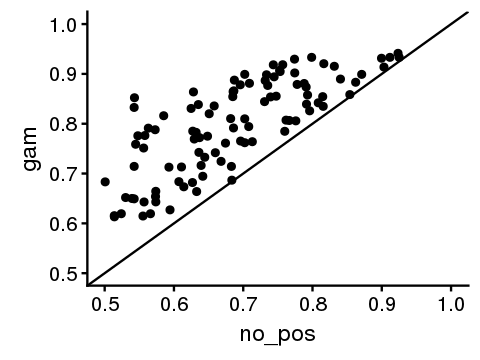

In [48]:
no_pos_relu <- ggplot(dt[task=="eCLIP"], aes(x = no_pos, y = gam)) + geom_point() + geom_abline() + xlim(c(.5, 1))+ylim(c(.5, 1))
no_pos_relu